In [1]:
library(NHANES)
library(tidyverse)
library(infer)
library(repr)
#graphics size for this document
options(repr.plot.width=6, repr.plot.height=4)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


We use the [NHANES](https://www.rdocumentation.org/packages/NHANES/versions/2.1.0/topics/NHANES) dataset from the NHANES R package. The data are collected by the Center for Disease Control (CDC, the national public health institute in the United States) and can be thought of as a random sample of US residents.

### Explore the dataset

In [2]:
colnames(NHANES)

[1] "ID"               "SurveyYr"         "Gender"           "Age"             
 [5] "AgeDecade"        "AgeMonths"        "Race1"            "Race3"           
 [9] "Education"        "MaritalStatus"    "HHIncome"         "HHIncomeMid"     
[13] "Poverty"          "HomeRooms"        "HomeOwn"          "Work"            
[17] "Weight"           "Length"           "HeadCirc"         "Height"          
[21] "BMI"              "BMICatUnder20yrs" "BMI_WHO"          "Pulse"           
[25] "BPSysAve"         "BPDiaAve"         "BPSys1"           "BPDia1"          
[29] "BPSys2"           "BPDia2"           "BPSys3"           "BPDia3"          
[33] "Testosterone"     "DirectChol"       "TotChol"          "UrineVol1"       
[37] "UrineFlow1"       "UrineVol2"        "UrineFlow2"       "Diabetes"        
[41] "DiabetesAge"      "HealthGen"        "DaysPhysHlthBad"  "DaysMentHlthBad" 
[45] "LittleInterest"   "Depressed"        "nPregnancies"     "nBabies"         
[49] "Age1stBaby"       "SleepHrsNight"    "SleepTrouble"     "PhysActive"      
[53] "PhysActiveDays"   "TVHrsDay"         "CompHrsDay"       "TVHrsDayChild"   
[57] "CompHrsDayChild"  "Alcohol12PlusYr"  "AlcoholDay"       "AlcoholYear"     
[61] "SmokeNow"         "Smoke100"         "Smoke100n"        "SmokeAge"        
[65] "Marijuana"        "AgeFirstMarij"    "RegularMarij"     "AgeRegMarij"     
[69] "HardDrugs"        "SexEver"          "SexAge"           "SexNumPartnLife" 
[73] "SexNumPartYear"   "SameSex"          "SexOrientation"   "PregnantNow"

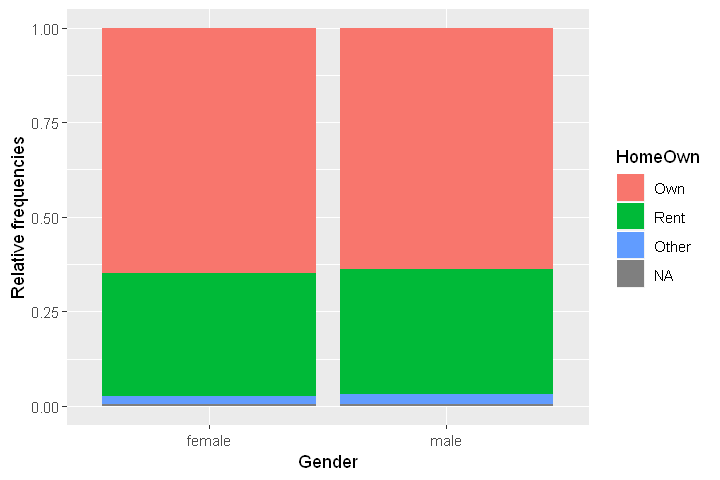

In [3]:
# Create bar plot for Home Ownership by Gender
ggplot(NHANES, aes(x = Gender, fill = HomeOwn)) + 
  # Set the position to fill
  geom_bar(position = "fill") +
  ylab("Relative frequencies")

Warning message:
"Removed 2245 rows containing non-finite values (stat_density)."

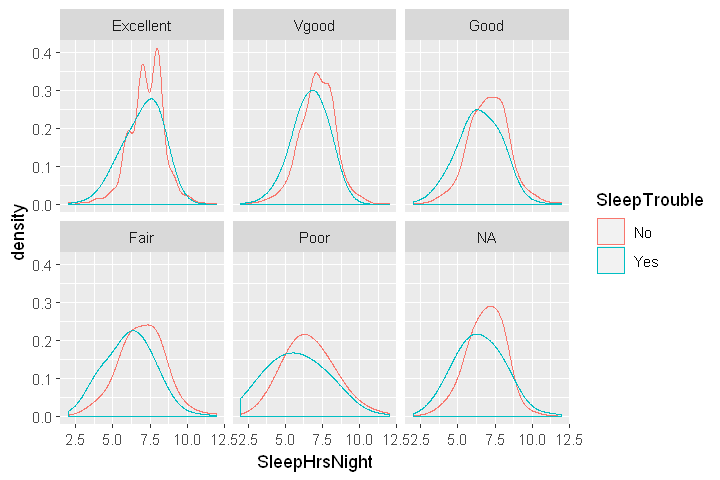

In [4]:
# Density plot of SleepHrsNight colored by SleepTrouble
ggplot(NHANES, aes(x = SleepHrsNight, color = SleepTrouble)) + 
  # Since SleepHrsNight contains discrete values, the density should be smoothed a bit using adjust = 2
  geom_density(adjust = 2) + 
  # Facet by HealthGen
  facet_wrap(~ HealthGen)

### Calculating statistic of interest
As seen in the video, natural variability can be modeled from shuffling observations around to remove any relationships that might exist in the population. However, before you permute the data, you need to calculate the original observed statistic. In this exercise, you will calculate the difference in proportion of home owners who are men versus women.

In [5]:
homes <- NHANES %>%
  # Select Gender and HomeOwn
  select(Gender, HomeOwn) %>%
  # Filter for HomeOwn equal to "Own" or "Rent"
  filter(HomeOwn %in% c("Own", "Rent"))

In [6]:
diff_orig <- homes %>%   
  # Group by gender
  group_by(Gender) %>%
  # Summarize proportion of homeowners
  summarize(prop_own = mean(HomeOwn == "Own")) %>%
  # Summarize difference in proportion of homeowners
  summarize(obs_diff_prop = diff(prop_own)) # male - female

In [7]:
diff_orig

obs_diff_prop
-0.007828723


### Randomized data under null model of independence

The infer package will allow you to model a particular null hypothesis and then randomize the data to calculate permuted statistics. In this exercise, after specifying your null hypothesis you will permute the home ownership variable 10 times. By doing so, you will ensure that there is no relationship between home ownership and gender, so any difference in home ownership proportion for female versus male will be due only to natural variability.

This exercise will demonstrate the first three steps from the `infer` package: + `specify` will specify the response and explanatory variables. + `hypothesize` will declare the null hypothesis. + `generate` will generate resamples, permutations, or simulations.

The `dplyr`, `ggplot2`, `NHANES`, and `infer` packages have been loaded for you and the homes dataset you created in the last exercise is available in your workspace.

In [8]:
# Perform 10 permutations
homeown_perm <- homes %>%
  specify(HomeOwn ~ Gender, success = "Own") %>%
  hypothesize(null = "independence") %>% 
  generate(reps = 10, type = "permute") 

# Notice that you went through three sequential steps: (1) the response and explanatory variables were defined by the specify command,
# (2) the independence null hypothesis was set, and
# (3) you successfully shuffled the response variable, HomeOwn, ten times. 
# Print results to console
homeown_perm

HomeOwn,Gender,replicate
Rent,male,1
Own,male,1
Rent,male,1
Own,male,1
Own,female,1
Own,male,1
Rent,male,1
Own,female,1
Own,female,1
Own,female,1


### Randomized statistics and dotplot

By permuting the home ownership variable multiple times, you generate differences in proportions that are consistent with the assumption that the variables are unrelated. The statistic of interest is the difference in proportions given by stat = "diff in props". After calculating the randomized statistics, you will plot them in a dotplot.

This exercise shows all four steps from the infer package:

* `specify` will specify the response and explanatory variables.
* `hypothesize` will declare the null hypothesis.
* `generate` will generate resamples, permutations, or simulations.
* `calculate` will calculate summary statistics.

Each step will be covered throughout the course; in this exercise you'll write code for `calculate()`.

In [9]:
# Perform 100 permutations
homeown_perm <- homes %>%
  specify(HomeOwn ~ Gender, success = "Own") %>%
  hypothesize(null = "independence") %>% 
  generate(reps = 100, type = "permute") %>% 
  calculate(stat = "diff in props", order = c("male", "female"))
  
# Print results to console
head(homeown_perm)

replicate,stat
1,0.0004089131
2,-0.0053574322
3,0.0078227856
4,-0.0123594229
5,-0.0119475411
6,0.0140010127


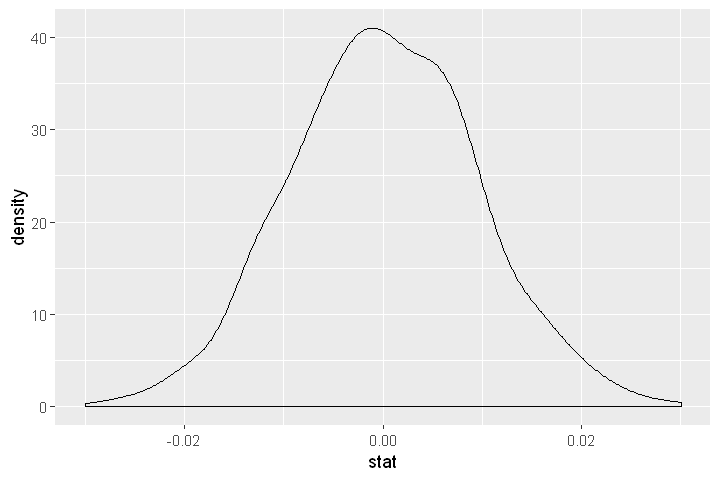

In [24]:
# Perform 100 permutations
homeown_perm <- homes %>%
  specify(HomeOwn ~ Gender, success = "Own") %>%
  hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "diff in props", order = c("male", "female"))
  
# Dotplot of 100 permuted differences in proportions
ggplot(homeown_perm, aes(x = stat)) + 
  geom_density()

### Do the data come from the population?

Recall that the observed difference (i.e. the difference in proportions in the homes dataset, shown as the red vertical line) was around -0.0078, which seems to fall below the bulk of the density of shuffled differences. It is important to know, however, whether any of the randomly permuted differences were as extreme as the observed difference.

In [25]:
homeown_perm2 <- homeown_perm %>% mutate(diff_orig = rep(-0.00783, nrow(homeown_perm)))
head(homeown_perm2)
dim(homeown_perm2)

replicate,stat,diff_orig
1,0.005351495,-0.00783
2,0.001644559,-0.00783
3,-0.005769314,-0.00783
4,0.005351495,-0.00783
5,-0.007004959,-0.00783
6,0.015648540,-0.00783


[1] 1000    3

In [26]:
str(homeown_perm2)

Classes 'tbl_df', 'tbl' and 'data.frame':	1000 obs. of  3 variables:
 $ replicate: int  1 2 3 4 5 6 7 8 9 10 ...
 $ stat     : num  0.00535 0.00164 -0.00577 0.00535 -0.007 ...
 $ diff_orig: num  -0.00783 -0.00783 -0.00783 -0.00783 -0.00783 -0.00783 -0.00783 -0.00783 -0.00783 -0.00783 ...


sum(stat <= -0.00783)
196


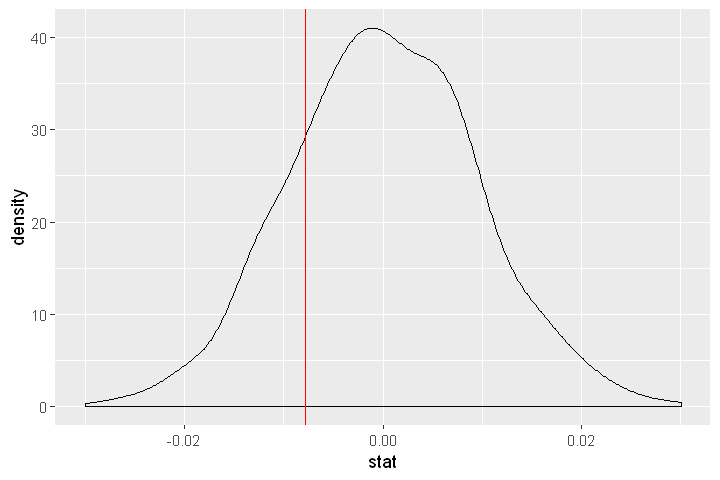

In [27]:
# Plot permuted differences, diff_perm
ggplot(homeown_perm2, aes(x = stat)) + 
  # Add a density layer
  geom_density() +
  # Add a vline layer with intercept diff_orig
  geom_vline(aes(xintercept = diff_orig), color = "red")

# Compare permuted differences to observed difference
homeown_perm %>%
  summarize(sum(stat <= -0.00783))

196 permuted differences are more extreme than the observed difference. This only represents 19.6% of the null statistics, so you can conclude that the observed difference is consistent with the permuted distribution. 

<b>We have learned that our data is consistent with the hypothesis of no difference in home ownership across gender.</b>

### Summarizing gender discrimination

As the first step of any analysis, you should look at and summarize the data. Categorical variables are often summarized using proportions, and it is always important to understand the denominator of the proportion.

Do you want the proportion of women who were promoted or the proportion of promoted individuals who were women? Here, you want the first of these, so in your R code it's necessary to `group_by()` the `sex` variable.

The discrimination study data are available in your workspace as `disc`.

In [81]:
sex <- factor(rep(c("male", "female"), c(3, 10)), level = c("female", "male"))
promote <- factor(rep(c("not_promoted"), 13), level = c("not_promoted", "promoted"))
x <- data.frame(sex, promote)
sex <- factor(rep(c("male", "female"), c(21, 14)), level = c("female", "male"))
promote <- factor(rep(c("promoted"), 35), level = c("not_promoted", "promoted"))
y <- data.frame(sex, promote)
disc <- bind_rows(x,y)

In [82]:
disc %>% 
    count(promote, sex)

promote,sex,n
not_promoted,female,10
not_promoted,male,3
promoted,female,14
promoted,male,21


In [83]:
# Find proportion of each sex who were promoted
disc %>%
  # Group by sex
  group_by(sex) %>%
  # Calculate proportion promoted summary stat
  summarise(promoted_prop = mean(promote == "promoted"))

sex,promoted_prop
female,0.5833333
male,0.8750000


In [84]:
# Replicate the entire data frame, permuting the promote variable
disc_perm <- disc %>%
  specify(promote ~ sex, success = "promoted") %>%
  hypothesize(null = "independence") %>%
  generate(reps = 5, type = "permute")

disc_perm %>%
  # Group by replicate
  group_by(replicate) %>%
  # Count per group
  count()

disc_perm %>%
  # Calculate difference in proportion, male then female
  calculate(stat = "diff in props", order = c("male", "female"))

replicate,n
1,48
2,48
3,48
4,48
5,48


replicate,stat
1,0.12500000
2,-0.04166667
3,-0.20833333
4,-0.12500000
5,0.12500000


### Randomizing gender discrimination

Recall that we are considering a situation where the number of men and women are fixed (representing the resumes) and the number of people promoted is fixed (the managers were able to promote only 35 individuals).

In this exercise, you'll create a randomization distribution of the null statistic with 1000 replicates as opposed to just 5 in the previous exercise. As a reminder, the statistic of interest is the difference in proportions promoted between genders (i.e. proportion for males minus proportion for females). From the original dataset, you can calculate how the promotion rates differ between males and females. Using the specify-hypothesis-generate-calculate workflow in infer, you can calculate the same statistic, but instead of getting a single number, you get a whole distribution. In this exercise, you'll compare that single number from the original dataset to the distribution made by the simulation.

In [85]:
# Calculate the observed difference in promotion rate
diff_orig <- disc %>%
  # Group by sex
  group_by(sex) %>%
  # Summarize to calculate fraction promoted
  summarise(prop_prom = mean(promote == "promoted")) %>%
  # Summarize to calculate difference
  summarise(stat = diff(prop_prom)) %>%
    pull()
    
# See the result
diff_orig

[1] 0.2916667

In [86]:
# Create data frame of permuted differences in promotion rates
disc_perm <- disc %>%
  # Specify promote vs. sex
  specify(promote ~ sex, success = "promoted") %>%
  # Set null hypothesis as independence
  hypothesize(null = "independence") %>%
  # Generate 1000 permutations
  generate(reps = 1000, type = "permute") %>%
  # Calculate difference in proportions
  calculate(stat = "diff in props", order = c("male", "female"))
head(disc_perm)

replicate,stat
1,0.04166667
2,-0.20833333
3,0.04166667
4,-0.04166667
5,-0.04166667
6,0.04166667


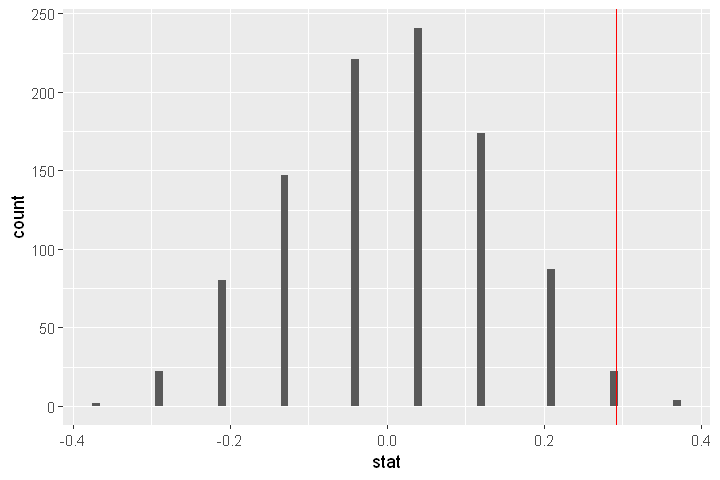

In [87]:
# Using permutation data, plot stat
ggplot(disc_perm, aes(x = stat)) + 
  # Add a histogram layer
  geom_histogram(binwidth = 0.01) +
  # Using original data, add a vertical line at stat
  geom_vline(aes(xintercept = diff_orig), color = "red")

In the population there is evidence that women are promoted at a different rate, but we cannot tell whether the difference is due to discrimination or something else.

### Critical region

It seems as though the statistic—a difference in promotion rates of 0.2917—is on the extreme end of the permutation distribution. That is, there are very few permuted differences which are as extreme as the observed difference.

To quantify the extreme permuted (null) differences, we use the `quantile()` function.

In [88]:
disc_perm %>% 
  summarize(
    # Find the 0.9 quantile of diff_perm's stat
    q.90 = quantile(stat, p = 0.9),
    # ... and the 0.95 quantile
    q.95 = quantile(stat, p = 0.95),
    # ... and the 0.99 quantile
    q.99 = quantile(stat, p = 0.99)
  )

q.90,q.95,q.99
0.2083333,0.2083333,0.2916667


### Two-sided critical region

For the discrimination data, the question at hand is whether or not women were promoted less often than men. However, there are often scenarios where the research question centers around a difference without directionality.

For example, you might be interested in whether the rate of promotion for men and women is different. In that case, a difference in proportions of -0.29 is just as "extreme" as a difference of positive 0.29.

If you had seen that women were promoted more often, what would the other side of the distribution of permuted differences look like? That is, what are the smallest (negative) values of the distribution of permuted differences?

In [89]:
# Use disc_perm
disc_perm %>% 
  # ... to calculate summary stats
  summarise(
    # Find the 0.01 quantile of stat
    q.01 = quantile(stat, p = 0.01),
    # ... and 0.05
    q.05 = quantile(stat, p = 0.05),
    # ... and 0.1 
    q.10 = quantile(stat, p = 0.10)
  )

q.01,q.05,q.10
-0.2916667,-0.2083333,-0.2083333


In [107]:
# create disc_small
sex <- factor(rep(c("male", "female"), c(1, 3)), level = c("female", "male"))
promote <- factor(rep(c("not_promoted"), 4), level = c("not_promoted", "promoted"))
x <- data.frame(sex, promote)
sex <- factor(rep(c("male", "female"), c(7, 5)), level = c("female", "male"))
promote <- factor(rep(c("promoted"), 12), level = c("not_promoted", "promoted"))
y <- data.frame(sex, promote)
disc_small <- bind_rows(y,x)

# create disc_big
sex <- factor(rep(c("male", "female"), c(30, 100)), level = c("female", "male"))
promote <- factor(rep(c("not_promoted"), 130), level = c("not_promoted", "promoted"))
x <- data.frame(sex, promote)
sex <- factor(rep(c("male", "female"), c(210, 140)), level = c("female", "male"))
promote <- factor(rep(c("promoted"), 350), level = c("not_promoted", "promoted"))
y <- data.frame(sex, promote)
disc_big <- bind_rows(y,x)

In [108]:
# Tabulate the small dataset
disc_small %>% 
  # Select sex and promote
  count(sex, promote)
  
# Do the same for disc_big
disc_big %>%
  count(sex, promote)

sex,promote,n
female,not_promoted,3
female,promoted,5
male,not_promoted,1
male,promoted,7


sex,promote,n
female,not_promoted,100
female,promoted,140
male,not_promoted,30
male,promoted,210


In [113]:
# Create data frame of permuted differences in promotion rates for the small data set
disc_perm_small <- disc_small %>%
  # Specify promote vs. sex
  specify(promote ~ sex, success = "promoted") %>%
  # Set null hypothesis as independence
  hypothesize(null = "independence") %>%
  # Generate 1000 permutations
  generate(reps = 1000, type = "permute") %>%
  # Calculate difference in proportions
  calculate(stat = "diff in props", order = c("male", "female"))

head(disc_perm_small)

# Calculate the observed difference in promotion rate
diff_orig_small <- disc_small %>%
  # Group by sex
  group_by(sex) %>%
  # Summarize to calculate fraction promoted
  summarise(prop_prom = mean(promote == "promoted")) %>%
  # Summarize to calculate difference
  summarise(stat = diff(prop_prom)) %>%
    pull()
    
# See the result
diff_orig_small


# Create data frame of permuted differences in promotion rates for the big data set
disc_perm_big <- disc_big %>%
  # Specify promote vs. sex
  specify(promote ~ sex, success = "promoted") %>%
  # Set null hypothesis as independence
  hypothesize(null = "independence") %>%
  # Generate 1000 permutations
  generate(reps = 1000, type = "permute") %>%
  # Calculate difference in proportions
  calculate(stat = "diff in props", order = c("male", "female"))

head(disc_perm_big)

# Calculate the observed difference in promotion rate
diff_orig_big <- disc_big %>%
  # Group by sex
  group_by(sex) %>%
  # Summarize to calculate fraction promoted
  summarise(prop_prom = mean(promote == "promoted")) %>%
  # Summarize to calculate difference
  summarise(stat = diff(prop_prom)) %>%
    pull()
    
# See the result
diff_orig_big

replicate,stat
1,0.25
2,-0.25
3,0.00
4,-0.25
5,-0.50
6,0.25


[1] 0.25

replicate,stat
1,-0.008333333
2,0.050000000
3,-0.041666667
4,0.025000000
5,0.041666667
6,0.033333333


[1] 0.2916667

### Sample size in randomization distribution

We've created two new datasets for you with essentially the same difference in proportions as the original discrimination data. However, one of the datasets (disc_small) is one third the size of the original dataset and the other (disc_big) is 10 times larger than the original dataset.

Additionally, the same permutation code used previously has been run on the small and big datasets to create small and big distributions of permuted differences in promotion rates (disc_small_perm and disc_big_perm, respectively).

In this exercise, you'll use these two new distributions to get a sense for how the differences vary given widely different sample sizes. In particular, notice the range of variability on the x-axis of each plot.

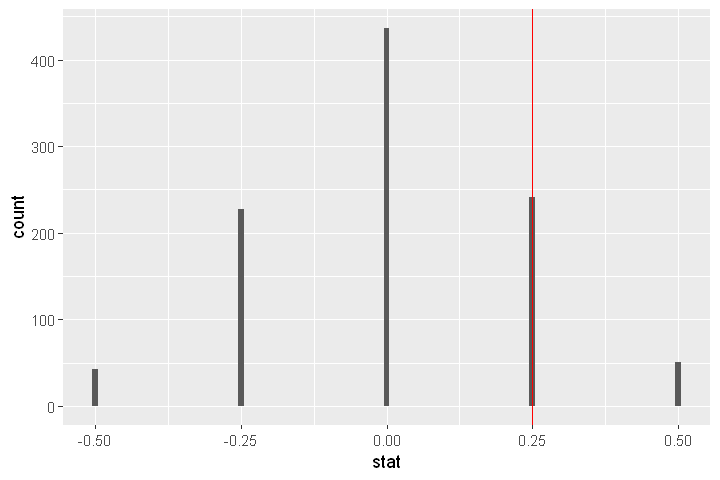

In [114]:
# Using disc_perm_small, plot stat
ggplot(disc_perm_small, aes(x = stat)) + 
  # Add a histogram layer with binwidth 0.01
  geom_histogram(binwidth = 0.01) +
  # Add a vline layer, crossing x-axis at diff_orig_small
  geom_vline(aes(xintercept = diff_orig_small), color = "red")

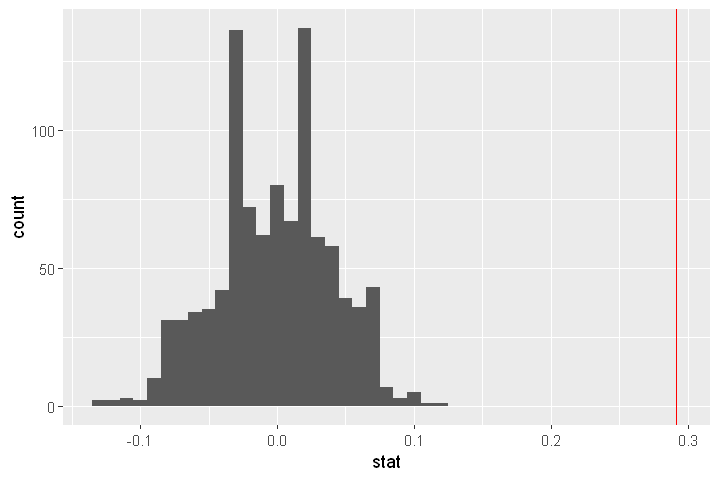

In [115]:
# Swap the dataset to disc_perm_big
ggplot(disc_perm_big, aes(x = stat)) + 
  geom_histogram(binwidth = 0.01) +
  # Change the x-axis intercept to diff_orig_big
  geom_vline(aes(xintercept = diff_orig_big), color = "red")

The observed difference is consistent with differences you would see by chance if the sample size was small. The observed difference would virtually never be observed by chance if the sample size was big. 

### Sample size for critical region

Using the randomization distributions with the small and big datasets, calculate different cutoffs for significance. Remember, you are most interested in a large positive difference in promotion rates, so you are calculating the upper quantiles of 0.90, 0.95, and 0.99.

A function for calculating these quantiles, calc_upper_quantiles() is sown in the script.

In [116]:
calc_upper_quantiles <- function(dataset) {
  dataset %>% 
    summarize(
      q.90 = quantile(stat, p = 0.90),
      q.95 = quantile(stat, p = 0.95),
      q.99 = quantile(stat, p = 0.99)
    )
}

# Recall the quantiles associated with the original dataset
calc_upper_quantiles(disc_perm)

# Calculate the quantiles associated with the small dataset
calc_upper_quantiles(disc_perm_small)

# Calculate the quantiles associated with the big dataset
calc_upper_quantiles(disc_perm_big)

q.90,q.95,q.99
0.2083333,0.2083333,0.2916667


q.90,q.95,q.99
0.25,0.5,0.5


q.90,q.95,q.99
0.05,0.06666667,0.08341667


 Notice how the differences in proportions must be much larger to be significant if the sample size is small. With a big sample size, a small difference in proportions can be significant. 

### Calculating the p-values

In the video, you learned that a p-value measures the degree of disagreement between the data and the null hypothesis. Here, you will calculate the p-value for the original discrimination dataset as well as the small and big versions, disc_small and disc_big.

The original differences in proportions are available in your workspace, diff_orig, diff_orig_small, and diff_orig_big.

Recall that you're only interested in the one-sided hypothesis test here. That is, you're trying to answer the question, "Are men more likely to be promoted than women?"

Warning message:
"`visualize()` shouldn't be used to plot p-value. Arguments `obs_stat`, `obs_stat_color`, `pvalue_fill`, and `direction` are deprecated. Use `shade_p_value()` instead."

p_value
0.026


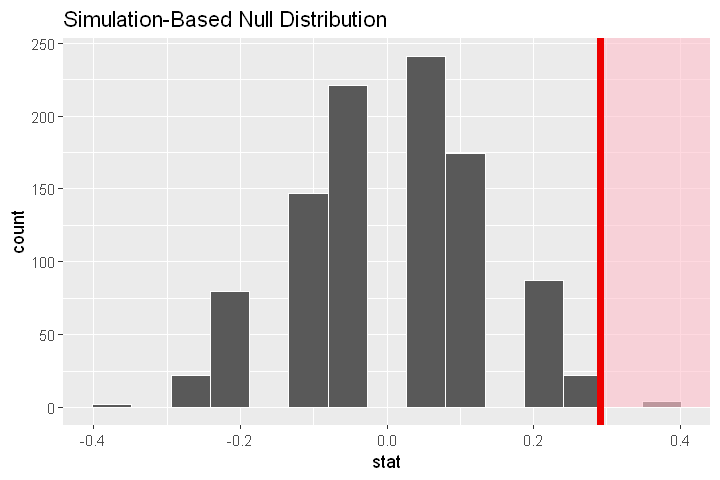

In [118]:
# Visualize and calculate the p-value for the original dataset
disc_perm %>%
  visualize(obs_stat = diff_orig,direction = "greater")

disc_perm %>%
  get_p_value(obs_stat = diff_orig, direction = "greater")

Warning message:
"`visualize()` shouldn't be used to plot p-value. Arguments `obs_stat`, `obs_stat_color`, `pvalue_fill`, and `direction` are deprecated. Use `shade_p_value()` instead."

p_value
0.292


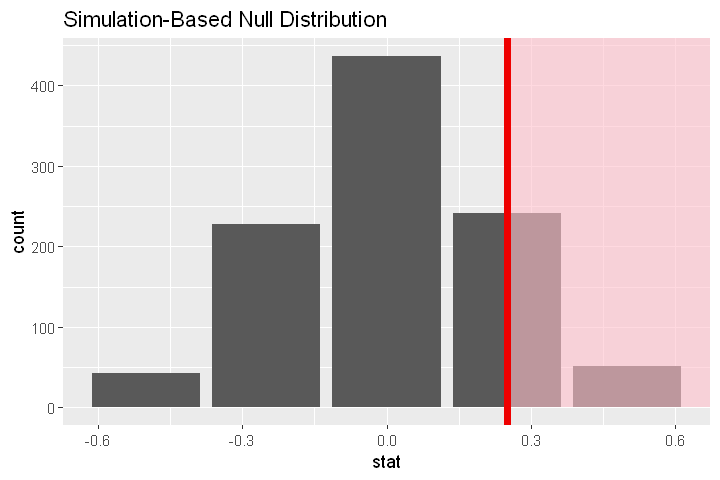

In [119]:
# Visualize and calculate the p-value for the small dataset
disc_perm_small %>%
  visualize(obs_stat = diff_orig_small, direction = "greater")

disc_perm_small %>%
  get_p_value(obs_stat = diff_orig_small, direction = "greater")

Warning message:
"`visualize()` shouldn't be used to plot p-value. Arguments `obs_stat`, `obs_stat_color`, `pvalue_fill`, and `direction` are deprecated. Use `shade_p_value()` instead."

p_value
0


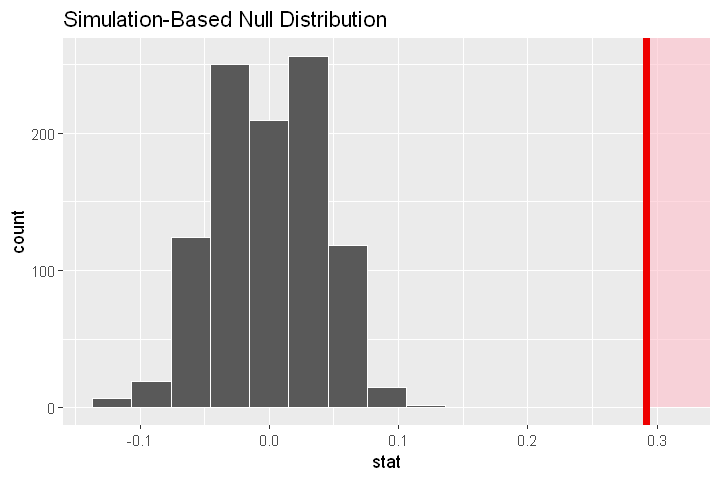

In [120]:
# Visualize and calculate the p-value for the original dataset
disc_perm_big %>%
  visualize(obs_stat = diff_orig_big, direction = "greater")

disc_perm_big %>%
  get_p_value(obs_stat = diff_orig_big, direction = "greater")

You may have noticed that the observed statistic is borderline significant (p-value = 0.03) for the original data. However, the same statistic would have been very consistent with the small dataset (p-value = 0.277 ) and extremely unusual for the large dataset (p-value = 0). 

### Practice calculating p-values

In the original dataset, 87.5% of the men were promoted and 58.3% of the women were promoted.

Consider a situation where there are 24 men, 24 women, and 35 people are still promoted. But in this new scenario, 75% of the men are promoted and 70.8% of the women are promoted. Does the difference in promotion rates still appear to be statistically significant? That is, could this difference in promotion rates have come from random chance?

You'll analyze these new data, contained in disc_new, using the same permutation algorithm from before.

The disc_perm and disc_perm_new datasets are available in your workspace.

In [124]:
# create disc_small
sex <- factor(rep(c("male", "female"), c(6, 7)), level = c("female", "male"))
promote <- factor(rep(c("not_promoted"), 13), level = c("not_promoted", "promoted"))
x <- data.frame(sex, promote)
sex <- factor(rep(c("male", "female"), c(18, 17)), level = c("female", "male"))
promote <- factor(rep(c("promoted"), 35), level = c("not_promoted", "promoted"))
y <- data.frame(sex, promote)
disc_new <- bind_rows(y,x)

# Create data frame of permuted differences in promotion rates for the new data set
disc_perm_new <- disc_new %>%
  # Specify promote vs. sex
  specify(promote ~ sex, success = "promoted") %>%
  # Set null hypothesis as independence
  hypothesize(null = "independence") %>%
  # Generate 1000 permutations
  generate(reps = 1000, type = "permute") %>%
  # Calculate difference in proportions
  calculate(stat = "diff in props", order = c("male", "female"))

# Calculate the observed difference in promotion rate
diff_orig_new <- disc_new %>%
  # Group by sex
  group_by(sex) %>%
  # Summarize to calculate fraction promoted
  summarise(prop_prom = mean(promote == "promoted")) %>%
  # Summarize to calculate difference
  summarise(stat = diff(prop_prom)) %>%
    pull()
    
# See the result
diff_orig_new

[1] 0.04166667

In [122]:
# Recall the original data
disc %>% 
  count(sex, promote)

# Tabulate the new data
disc_new %>%
  count(sex, promote)

sex,promote,n
female,not_promoted,10
female,promoted,14
male,not_promoted,3
male,promoted,21


sex,promote,n
female,not_promoted,7
female,promoted,17
male,not_promoted,6
male,promoted,18


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


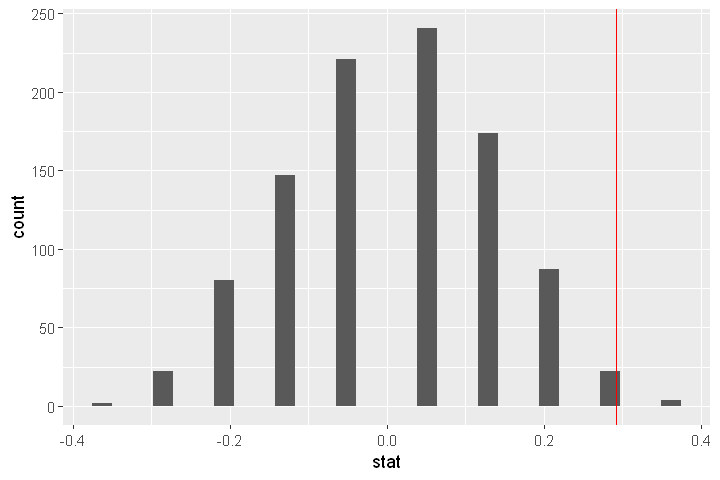

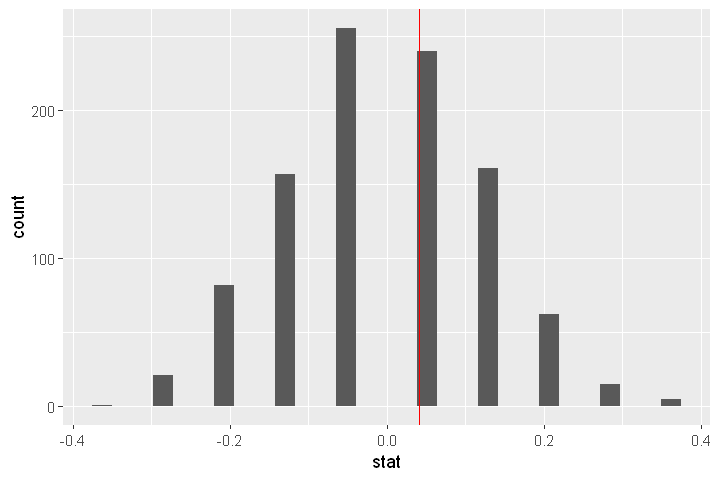

In [126]:
# Recall the distribution of the original permuted differences
ggplot(disc_perm, aes(x = stat)) + 
  geom_histogram() +
  geom_vline(aes(xintercept = diff_orig), color = "red")

# Plot the distribution of the new permuted differences
ggplot(disc_perm_new, aes(x = stat)) +
  geom_histogram() + 
  geom_vline(aes(xintercept = diff_orig_new), color = "red")

In [127]:
# Recall the p-value from the original data
disc_perm %>%
  summarize(p_value = mean(diff_orig <= stat))

# Find the p-value from the new data
disc_perm_new %>%
  summarize(p_value = mean(diff_orig_new <= stat))

p_value
0.026


p_value
0.483


### Calculating two-sided p-values

What if the original research hypothesis had focused on any difference in promotion rates between men and women instead of focusing on whether men are more likely to be promoted than women? In this case, a difference like the one observed would occur twice as often (by chance) because sometimes the difference would be positive and sometimes it would be negative.

When there is no directionality to the alternative hypothesis, the hypothesis and p-value are considered to be two-sided. In a two-sided setting, the p-value is double the one-sided p-value.

In this exercise, you'll calculate a two-sided p-value given the original randomization distribution and dataset.

The observed difference is stored in diff_orig and the difference in each permutation is the stat column of disc_perm.

In [128]:
# Calculate the two-sided p-value
disc_perm %>%
  summarize(p_value = 2 * mean(diff_orig <= stat))

p_value
0.052


 Notice, from the calculation, that the two-sided p-value is twice as big as the one-sided p-value. Often, two-sided p-values are preferred as a way of avoiding making false significance claims. 

### Casestudy - buying DVD after knowing of saving


In [131]:
# create 
decision <- factor(rep(c("buyDVD", "nobuyDVD"), c(56, 19)), level = c("buyDVD", "nobuyDVD"))
group <- factor(rep(c("control"), 75), level = c("control", "treatment"))
x <- data.frame(decision, group)

decision <- factor(rep(c("buyDVD", "nobuyDVD"), c(41, 34)), level = c("buyDVD", "nobuyDVD"))
group <- factor(rep(c("treatment"), 75), level = c("control", "treatment"))
y <- data.frame(decision, group)
opportunity <- bind_rows(y,x)

In [132]:
# Tabulate the data
opportunity %>%
  count(decision, group)

# Find the proportion who bought the DVD in each group
opportunity %>%
  group_by(group) %>%
  summarize(buy_prop = mean(decision == "buyDVD"))

decision,group,n
buyDVD,control,56
buyDVD,treatment,41
nobuyDVD,control,19
nobuyDVD,treatment,34


group,buy_prop
control,0.7466667
treatment,0.5466667


About 75% of the control group bought the DVD and about 55% of the treatment group (i.e. The group that was reminded that the money could be saved) bought the DVD. Interesting!

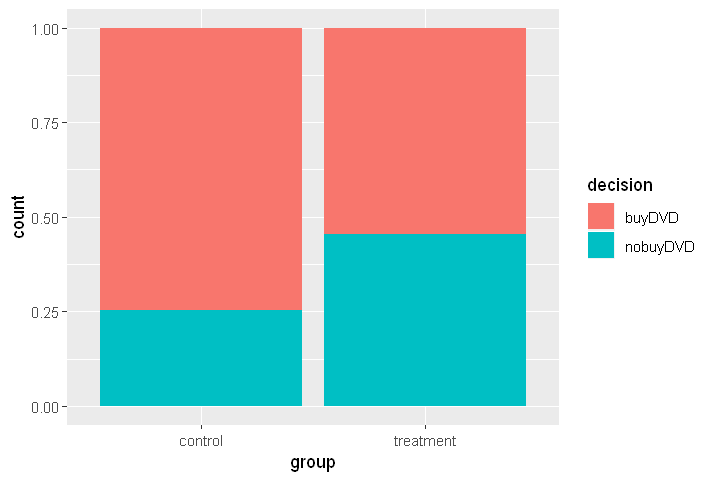

In [133]:
# Plot group, filled by decision
ggplot(opportunity, aes(x = group, fill = decision)) + 
  # Add a bar layer, with position "fill"
  geom_bar(position = "fill")

The barplot better displays the results from the study. The treatment seems like it might have had an effect. 

### Randomizing opportunity cost

As in Chapter 2 Exercise 5, you will permute the data to generate a distribution of differences as if the null hypothesis were true.

In the study, the number of individuals in each of the control and treatment groups is fixed. Additionally, when you assume that the null hypothesis is true—that is, the experiment had no effect on the outcome of buying a DVD—it is reasonable to infer that the number of individuals who would buy a DVD is also fixed. That is, 97 people were going to buy a DVD regardless of which treatment group they were in.

Using the new data and the methods from the previous chapter, create a randomization distribution of the difference in proportions calculated on permuted data.

In [134]:
# Calculate the observed difference in purchase rate
diff_obs <- opportunity %>%
  # Group by group
  group_by(group) %>%
  # Calculate proportion deciding to buy a DVD
  summarise(prop_buy = mean(decision == "buyDVD")) %>%
  # Calculate difference between groups
  summarise(stat = diff(prop_buy)) %>% 
  pull()

In [141]:
diff_obs

[1] -0.2

In [137]:
# Create data frame of permuted differences in purchase rates
opp_perm <- opportunity %>%
  # Specify decision vs. group, where success is buying a DVD
  specify(decision ~ group, success = "buyDVD") %>%
  # Set the null hypothesis to independence
  hypothesize(null = "independence") %>%
  # Generate 1000 reps of type permute
  generate(reps = 1000, type = "permute") %>%
  # Calculate the summary stat difference in proportions
  calculate(stat = "diff in props", order = c("treatment", "control"))
    
# Review the result
head(opp_perm)

replicate,stat
1,0.09333333
2,-0.09333333
3,-0.09333333
4,-0.01333333
5,-0.09333333
6,-0.06666667


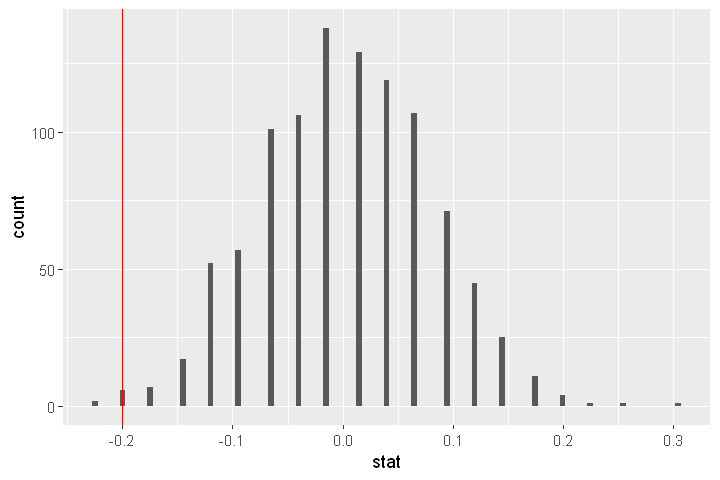

In [138]:
# Using the permuation data, plot stat
ggplot(opp_perm, aes(x = stat)) + 
  # Add a histogram layer with binwidth 0.005
  geom_histogram(binwidth = 0.005) +
  # Add a vline layer with intercept diff_obs
  geom_vline(aes(xintercept = diff_obs), color = "red")

Warning message:
"`visualize()` shouldn't be used to plot p-value. Arguments `obs_stat`, `obs_stat_color`, `pvalue_fill`, and `direction` are deprecated. Use `shade_p_value()` instead."

p_value
0.008


p_value
0.008


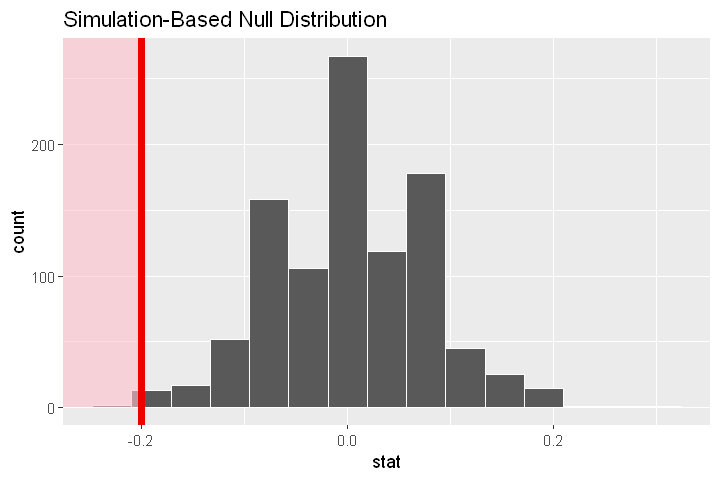

In [140]:
# Visualize the statistic 
opp_perm %>%
  visualize(obs_stat = diff_obs, direction = "less")

# Calculate the p-value using `get_p_value`
opp_perm %>%
  get_p_value(obs_stat = diff_obs, direction = "less")

# Calculate the p-value using `summarize`
opp_perm %>%
  summarize(p_value = mean(stat <= diff_obs))

The small p-value indicates that the observed data are inconsistent with the null hypothesis. We should reject the null claim and conclude that financial advice does affect the likelihood of purchase. 

Based on this result of 0.008, what can you conclude from the study about the effect of reminding students to save money?
* Reminding them causes them to be less likely to buy the DVD

#  interval estimate - Bootstrapping 
### Resampling from a sample

To investigate how much the estimates of a population proportion change from sample to sample, you will set up two sampling experiments.

In the first experiment, you will simulate repeated samples from a population. In the second, you will choose a single sample from the first experiment and repeatedly resample from that sample: a method called bootstrapping. More specifically:

<b>Experiment 1</b>: Assume the true proportion of people who will vote for Candidate X is 0.6. Repeatedly sample 30 people from the population and measure the variability of $\hat{p}$(the *sample* proportion).

<b>Experiment 2</b>: Take one sample of size 30 from the same population. Repeatedly sample 30 people (with replacement!) from the original sample and measure the variability of $\hat{p}^∗$ (the *resample* proportion).

It's important to realize that the first experiment relies on knowing the population and is typically impossible in practice. The second relies only on the sample of data and is therefore easy to implement for any statistic. Fortunately, as you will see, the variability in $\hat{p}$, or the proportion of "successes" in a sample, is approximately the same whether we sample from the population or resample from a sample.